In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Conectar ao banco de dados
conn = sqlite3.connect('/Users/tiagosilva/Desktop/Data Analyst /F1 DATA ANALYST/F1_Analysis.db')

   year driver_name nationality  points  position
0  1950      farina     Italian     9.0         1
1  1950      fangio   Argentine    26.0         1
2  1950      farina     Italian     9.0         1
3  1950      farina     Italian     9.0         1
4  1950      farina     Italian    18.0         1


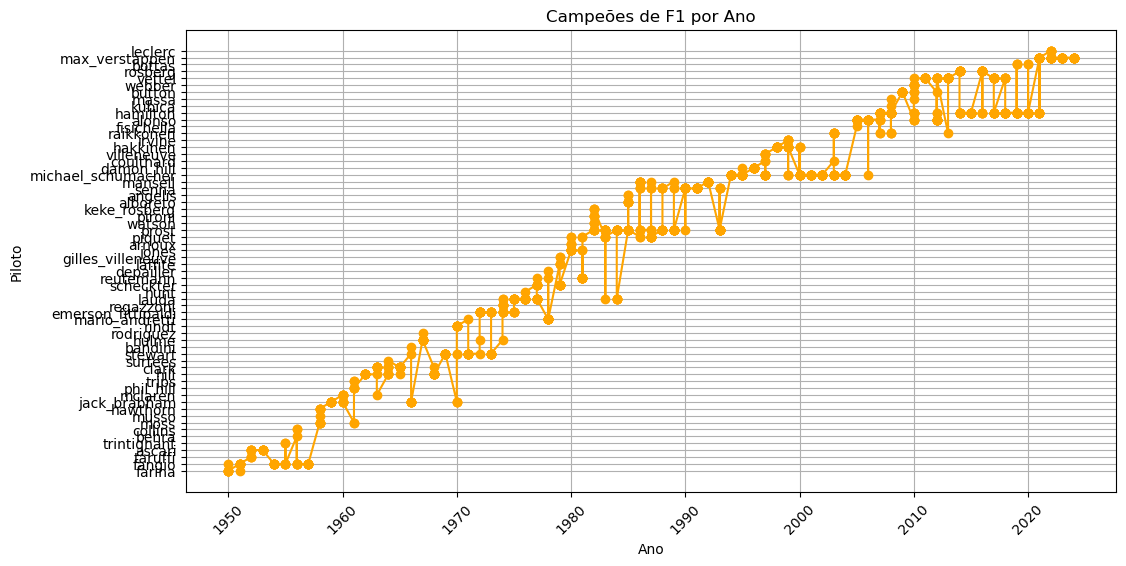

In [7]:
# Consulta SQL para campeões
query_champions = """
SELECT 
    r.year,
    d.driverRef AS driver_name,
    d.nationality,
    ds.points,
    ds.position
FROM driver_standings ds
JOIN drivers d ON ds.driverId = d.driverId
JOIN races r ON ds.raceId = r.raceId
WHERE ds.position = 1  -- Apenas os campeões
ORDER BY r.year;
"""

champions = pd.read_sql_query(query_champions, conn)

# Exibir os primeiros registros
print(champions.head())

# Gráfico de linha para campeões por ano
plt.figure(figsize=(12, 6))
plt.plot(champions['year'], champions['driver_name'], marker='o', linestyle='-', color='orange')
plt.title('Campeões de F1 por Ano')
plt.xlabel('Ano')
plt.ylabel('Piloto')
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()


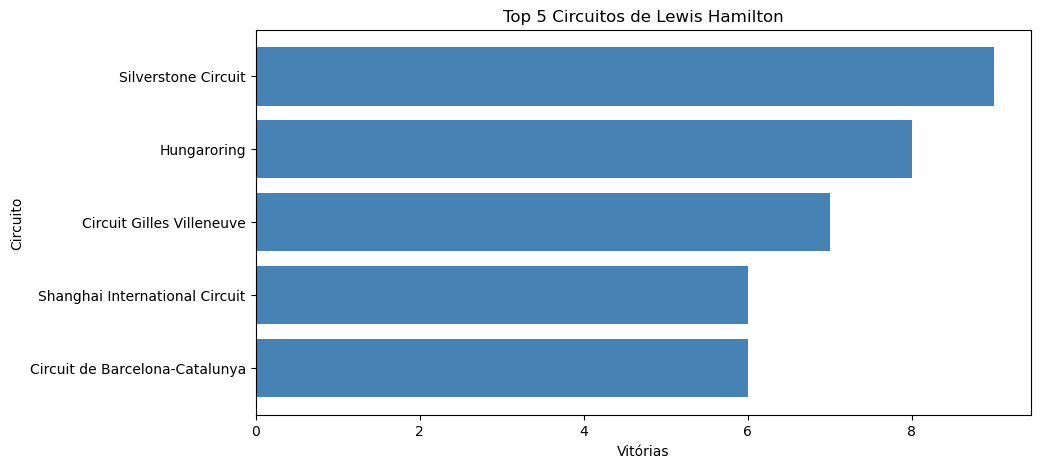

In [11]:
# Query vitórias de Hamilton
query_hamilton = """
SELECT c.name AS circuit_name, COUNT(*) AS wins
FROM results as r
JOIN races as ra ON r.raceId = ra.raceId
JOIN circuits as c ON ra.circuitId = c.circuitId
JOIN drivers as d ON r.driverId = d.driverId
WHERE r.positionOrder = 1 AND d.driverRef = 'hamilton'
GROUP BY c.name
ORDER BY wins DESC
LIMIT 5;
"""

hamilton_circuits = pd.read_sql_query(query_hamilton, conn)

# Gráfico de barras horizontais
plt.figure(figsize=(10, 5))
plt.barh(hamilton_circuits['circuit_name'], hamilton_circuits['wins'], color='steelblue')
plt.title('Top 5 Circuitos de Lewis Hamilton')
plt.xlabel('Vitórias')
plt.ylabel('Circuito')
plt.gca().invert_yaxis()  # Inverter para colocar o maior no topo
plt.show()

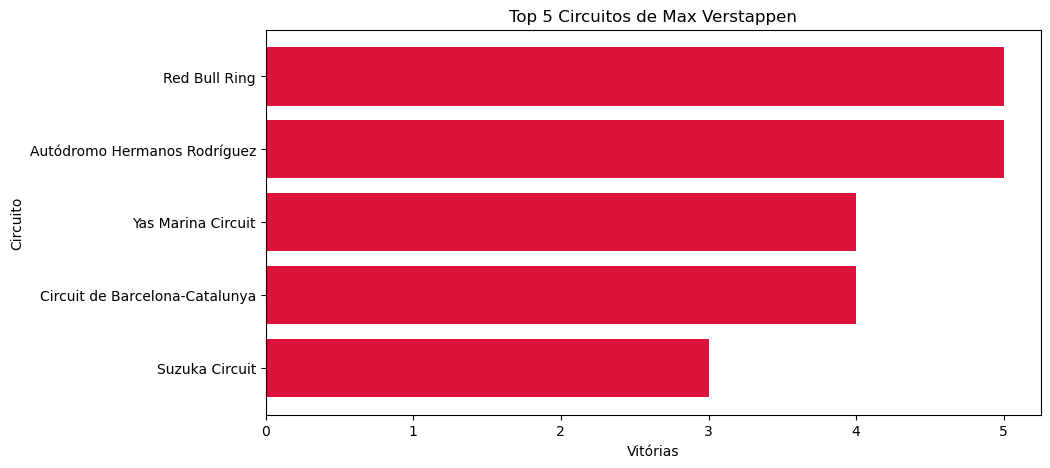

In [13]:
# Query vitórias de Verstappen
query_verstappen = """
SELECT c.name AS circuit_name, COUNT(*) AS wins
FROM results as r
JOIN races as ra ON r.raceId = ra.raceId
JOIN circuits as c ON ra.circuitId = c.circuitId
JOIN drivers as d ON r.driverId = d.driverId
WHERE r.positionOrder = 1 AND d.driverRef = 'max_verstappen'
GROUP BY c.name
ORDER BY wins DESC
LIMIT 5;
"""

verstappen_circuits = pd.read_sql_query(query_verstappen, conn)

# Gráfico de barras horizontais
plt.figure(figsize=(10, 5))
plt.barh(verstappen_circuits['circuit_name'], verstappen_circuits['wins'], color='crimson')
plt.title('Top 5 Circuitos de Max Verstappen')
plt.xlabel('Vitórias')
plt.ylabel('Circuito')
plt.gca().invert_yaxis()
plt.show()

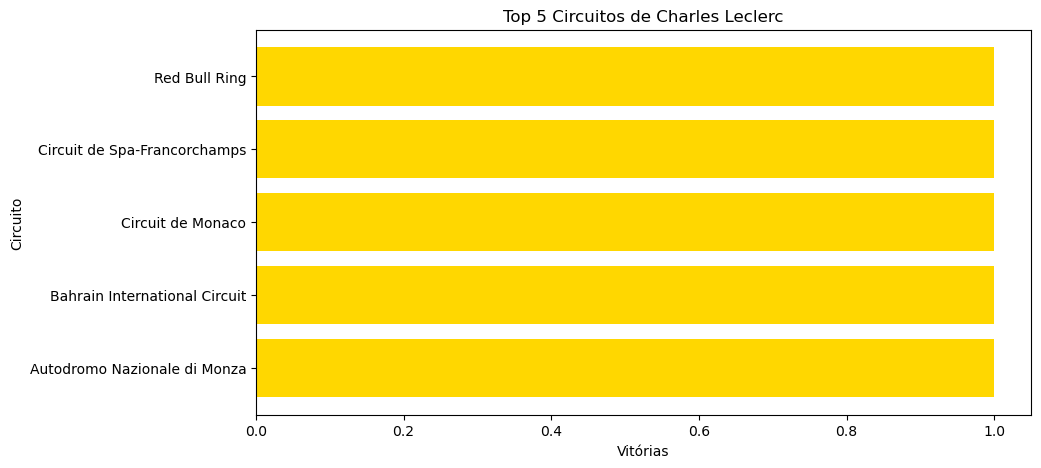

In [15]:
# Query vitórias de Leclerc
query_leclerc = """
SELECT c.name AS circuit_name, COUNT(*) AS wins
FROM results as r
JOIN races as ra ON r.raceId = ra.raceId
JOIN circuits as c ON ra.circuitId = c.circuitId
JOIN drivers as d ON r.driverId = d.driverId
WHERE r.positionOrder = 1 AND d.driverRef = 'leclerc'
GROUP BY c.name
ORDER BY wins DESC
LIMIT 5;
"""

leclerc_circuits = pd.read_sql_query(query_leclerc, conn)

# Gráfico de barras horizontais
plt.figure(figsize=(10, 5))
plt.barh(leclerc_circuits['circuit_name'], leclerc_circuits['wins'], color='gold')
plt.title('Top 5 Circuitos de Charles Leclerc')
plt.xlabel('Vitórias')
plt.ylabel('Circuito')
plt.gca().invert_yaxis()
plt.show()

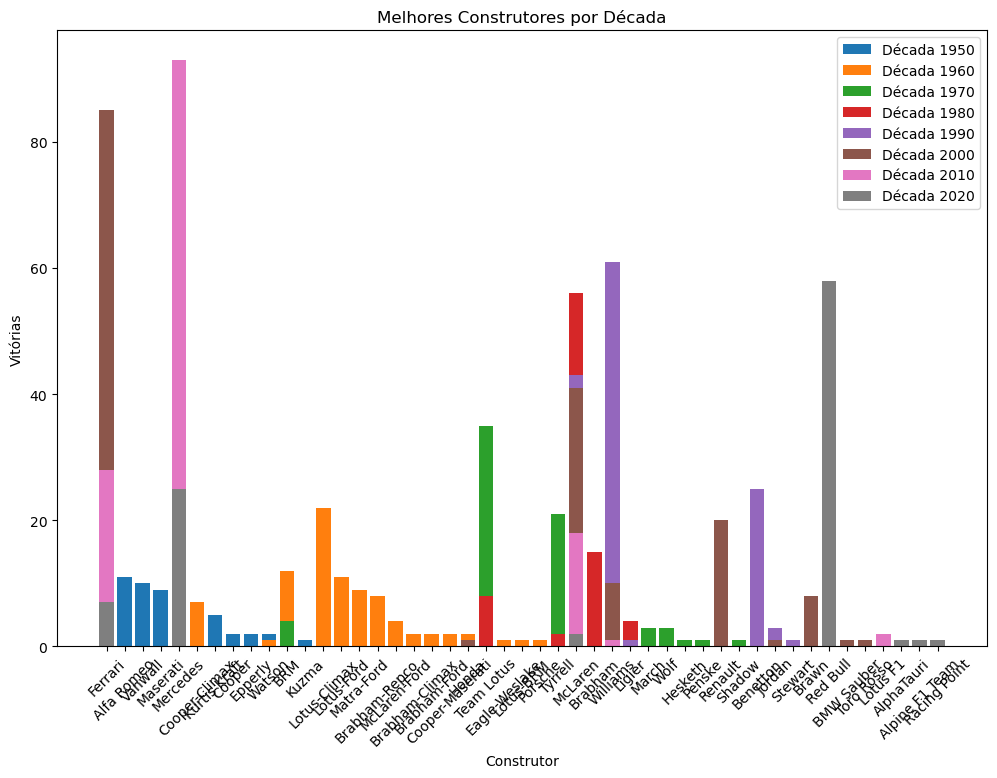

In [17]:
# Query melhores construtores por década
query_constructors = """
SELECT 
    c.name AS constructor_name,
    COUNT(r.positionOrder) AS wins,
    (ra.year / 10) * 10 AS decade
FROM results r
JOIN constructors c ON r.constructorId = c.constructorId
JOIN races ra ON r.raceId = ra.raceId
WHERE r.positionOrder = 1
GROUP BY c.name, decade
ORDER BY decade, wins DESC;
"""

constructors_decades = pd.read_sql_query(query_constructors, conn)

# Gráfico de barras empilhadas por década
plt.figure(figsize=(12, 8))
for decade in constructors_decades['decade'].unique():
    subset = constructors_decades[constructors_decades['decade'] == decade]
    plt.bar(subset['constructor_name'], subset['wins'], label=f'Década {int(decade)}')

plt.title('Melhores Construtores por Década')
plt.xlabel('Construtor')
plt.ylabel('Vitórias')
plt.xticks(rotation=45)
plt.legend()
plt.show()
